# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


In [ ]:
x, y = load_iris(return_X_y=True)

# розбивка
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# пайплайн + параметри
pipe_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

params = {
    'knn__n_neighbors': list(range(1, 21))
}

# тренування
grid_clf = GridSearchCV(
    pipe_clf,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_clf.fit(x_train, y_train)

print("Best K =", grid_clf.best_params_['knn__n_neighbors'])
print("Accuracy (test) = ", round(grid_clf.score(x_test, y_test), 3))
print("Accuracy (train) = ", round(grid_clf.score(x_train, y_train), 3))


Best K = 14
Accuracy (test) =  0.956
Accuracy (train) =  0.981


## Synthetic dataset  

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

x1, y1 = make_classification(
    n_samples=150,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.6,
    random_state=25
)


x1.shape, y1.shape


((150, 2), (150,))

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1, y1,
    test_size=0.3,
    random_state=25,
    stratify=y1
)

synth_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

params1 = {
    'knn__n_neighbors': list(range(1, 21))
}

grid_synth = GridSearchCV(
    synth_pipe,
    param_grid=params1,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

grid_synth.fit(x1_train, y1_train)
best_k = grid_synth.best_params_['knn__n_neighbors']

print("Best K = ", grid_synth.best_params_['knn__n_neighbors'])
print("R2 test = ", round(grid_synth.score(x1_test, y1_test), 3))
print("R2 train = ", round(grid_synth.score(x1_train, y1_train), 3))


Best K =  2
R2 test =  0.822
R2 train =  0.962


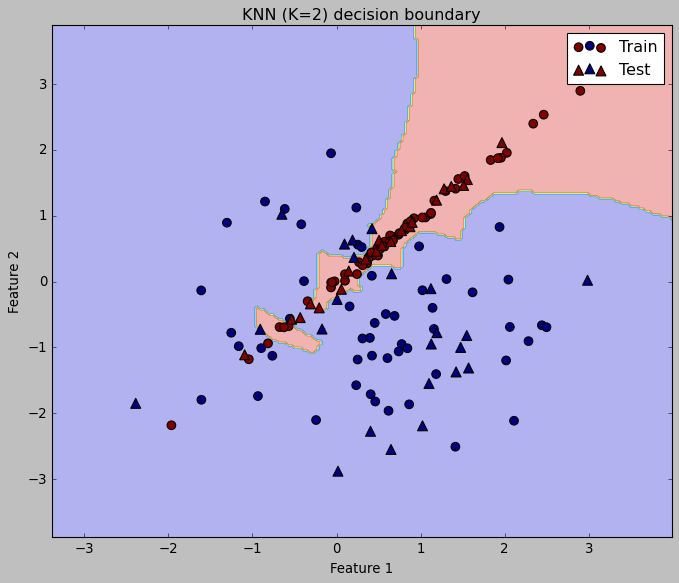

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(x1[:, 0].min()-1, x1[:, 0].max()+1, 200),
    np.linspace(x1[:, 1].min()-1, x1[:, 1].max()+1, 200)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = grid_synth.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(x1_train[:, 0], x1_train[:, 1],
            c=y1_train, edgecolor='k', label='Train', s=60)
plt.scatter(x1_test[:, 0], x1_test[:, 1],  c=y1_test,
            edgecolor='k', marker='^', label='Test', s=80)

plt.title(f"KNN (K={best_k}) decision boundary")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
